In [4]:
# Thư viện
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
# Lấy dữ liệu
data = pd.read_csv('../Data/Education.csv')
data.head()

,Text,Label
0,The impact of educational reforms remains unce...,positive
1,Critics argue that recent improvements in the ...,negative
2,Innovative teaching methods have led to unexpe...,positive
3,"Despite budget constraints, the school has man...",positive
4,The true effectiveness of online learning plat...,negative


In [6]:
# tạo hàm train test
def split_train_test(data, ratio_test):
    np.random.seed(00)
    index_permu = np.random.permutation(len(data))
    data_permu = data.iloc[index_permu]
    test_size = int(len(data_permu)*ratio_test)
    train_set = data_permu.iloc[:-test_size]
    test_set = data_permu.iloc[-test_size:]
    return train_set, test_set

In [7]:
train_set, test_set = split_train_test(data, 0.2)
train_set.reset_index(drop = True, inplace = True)
test_set.reset_index(drop = True, inplace = True)
print("Kích thước tập train:", len(train_set))
print("Kích thước tập train:", len(test_set))

Kích thước tập train: 42
Kích thước tập train: 10


In [8]:
X_train, y_train = train_set['Text'], train_set['Label']
X_test, y_test = test_set['Text'], test_set['Label']
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))
print(X_test)
print(y_test)

42 42
10 10
0    Privatization of education leads to disparitie...
1    Teacher evaluations based on student test scor...
2    Educational policies fail to address the diver...
3    Teacher tenure policies aim to protect educato...
4    Public education should be funded adequately t...
5    Charter schools drain resources from public ed...
6    Despite budget constraints, the school has man...
7    The impact of educational reforms remains unce...
8    Educational policies should be responsive to t...
9    Project-based learning encourages collaboratio...
Name: Text, dtype: object
0    negative
1    negative
2    negative
3    positive
4    negative
5    negative
6    positive
7    positive
8    negative
9    positive
Name: Label, dtype: object


In [9]:
print(y_train.value_counts())
print(y_test.value_counts())

Label
positive    22
negative    20
Name: count, dtype: int64
Label
negative    6
positive    4
Name: count, dtype: int64


In [10]:
# chuyển đổi positive: 1 và negative: 0
print(y_train.head())
y_train = y_train.map({"positive": 1, "negative": 0})
y_train.head()

0    positive
1    negative
2    positive
3    negative
4    positive
Name: Label, dtype: object


0    1
1    0
2    1
3    0
4    1
Name: Label, dtype: int64

In [11]:
# count1: phân phối Bernoulli --> cài tham số binary: True
count1 = CountVectorizer(binary = True, stop_words = 'english') # dùng bộ lọc trong tiếng anh
count1.fit(X_train)
X_train = count1.transform(X_train)
print(X_train.toarray())
print(X_train.toarray().shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(42, 211)


In [12]:
# xem tên các đặc trưng
get_name = count1.get_feature_names_out()
print(get_name)
print(len(get_name)) 

['abilities' 'academic' 'access' 'accommodate' 'achievement' 'adequate'
 'affluent' 'allocation' 'alternatives' 'anxiety' 'argue' 'awareness'
 'backgrounds' 'based' 'best' 'bridge' 'budget' 'capture' 'challenges'
 'charter' 'childhood' 'citizenship' 'class' 'classroom' 'classrooms'
 'collaboration' 'communities' 'competence' 'competition' 'complex'
 'connections' 'contentious' 'create' 'creativity' 'critical' 'critics'
 'crucial' 'cultural' 'culture' 'curricula' 'curriculum' 'cuts' 'debate'
 'debated' 'decreased' 'despite' 'disparities' 'diverse' 'diversity'
 'divert' 'early' 'education' 'educational' 'educators' 'effectiveness'
 'efforts' 'emphasis' 'emphasize' 'empower' 'engagement' 'essential'
 'evaluation' 'exacerbate' 'exam' 'expense' 'faces' 'fail' 'falls'
 'favoring' 'favors' 'fewer' 'flexibility' 'flexible' 'focus' 'fosters'
 'foundation' 'funding' 'gains' 'gap' 'global' 'higher' 'hindering'
 'holistic' 'impersonal' 'important' 'improvements' 'inclusivity'
 'incorporate' 'incre

In [13]:
bernoulli = BernoulliNB()
model1 = bernoulli.fit(X_train, y_train)

In [14]:
# chuyển đổi X_test về ma trận trước khi dự đoán
# lưu ý: biến đổi dựa trên các đặc trưng của count 1
X_test = count1.transform(X_test)
print(X_test.toarray())
print(X_test.shape)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10, 211)


In [15]:
y_pred = model1.predict(X_test)
y_pred_proba = model1.predict_proba(X_test)
print(y_pred)
print(y_pred_proba)
y_pred_trans = np.where(y_pred == 0, "negative", "positive")
print(y_pred_trans)

[1 1 0 1 1 0 1 1 1 1]
[[0.10866287 0.89133713]
 [0.10450998 0.89549002]
 [0.76197449 0.23802551]
 [0.15560099 0.84439901]
 [0.26849467 0.73150533]
 [0.92064774 0.07935226]
 [0.46864237 0.53135763]
 [0.22121342 0.77878658]
 [0.37363082 0.62636918]
 [0.00829199 0.99170801]]
['positive' 'positive' 'negative' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'positive']


In [16]:
list(zip(y_pred_trans, y_test))

[(np.str_('positive'), 'negative'),
 (np.str_('positive'), 'negative'),
 (np.str_('negative'), 'negative'),
 (np.str_('positive'), 'positive'),
 (np.str_('positive'), 'negative'),
 (np.str_('negative'), 'negative'),
 (np.str_('positive'), 'positive'),
 (np.str_('positive'), 'positive'),
 (np.str_('positive'), 'negative'),
 (np.str_('positive'), 'positive')]

In [17]:
# có 4 độ đo phổ biến cho bài toán phân loại: accuracy, precision, recall, F1 score

In [18]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_trans)
print(confusion)

[[2 4]
 [0 4]]


In [19]:
# đối chiếu với lý thuyết ta thấy: TN = 2, FP = 4, FN = 0, TP = 4
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
print(TN, FP, FN, TP)

2 4 0 4


In [20]:
accuracy = (TP + TN)/len(y_pred_trans)
precision = TP/(TP + FP)
recall = TP/(TP + FN)
f1_score = round(2*(precision*recall)/(precision + recall), 2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Accuracy: 0.6
Precision: 0.5
Recall: 1.0
F1-score: 0.67


In [21]:
# hàm xem nhanh các độ đo
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_trans))

              precision    recall  f1-score   support

    negative       1.00      0.33      0.50         6
    positive       0.50      1.00      0.67         4

    accuracy                           0.60        10
   macro avg       0.75      0.67      0.58        10
weighted avg       0.80      0.60      0.57        10



In [22]:
# đường cong ROC, AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label = 'positive')
# diện tích dưới đường cong ROC
auc = auc(fpr, tpr)
print(auc)

0.6666666666666667


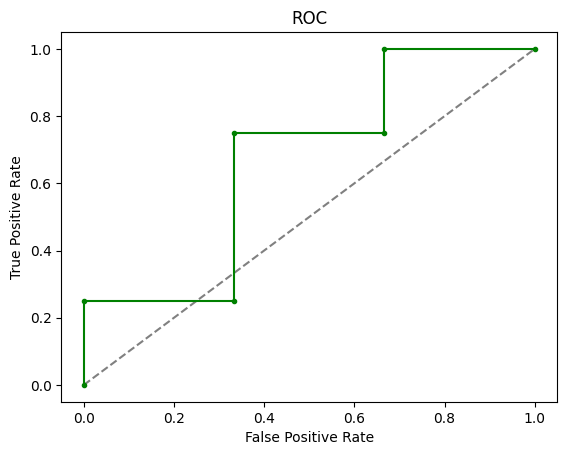

In [24]:
# vẽ đường cong ROC
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'gray')
plt.plot(fpr, tpr, marker = '.', color = 'green')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

In [ ]:
# tương tự áp dụng thuật toán Naive Bayes dùng phân phối Multinomial cho bài tập này.
# khi dùng Multinomial thì lưu ý chuyển tham số binary = False (mặc định).
# so sánh kết quả của hai phân phối binary và multinomial.